In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
df = pd.read_csv("/Users/niveditaj/Downloads/GamingStudy_data 2.csv", encoding = 'ISO-8859-1')
df.head()
df.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)
df.describe().T
df.dtypes
df.info()
df.isnull().sum()
for i in df:
    print('-------------')
    print(df[i].value_counts().head(15))
    print('-------------')
for i in df:
    print('------',i,'------')
    print(df[i].unique()[:30])
    print('-------------')
for i in df:
    print('------',i,'------')
    print(df[i].nunique())
    print('-------------')
df.shape
df['Hours_streams'] = df['Hours'] + df['streams']
df.drop(  ((df[df['Hours_streams'] > 115].index) | (df[df['Hours_streams']==0].index)),
                                             axis=0,inplace=True)
df['Hours_streams'].value_counts()
df.GADE.value_counts()
df.GADE.fillna(df.GADE.value_counts().index[1] , inplace=True) #1
df.GADE.value_counts()
df.shape
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)
df.drop('Hours_streams' , axis = 1 , inplace = True)
print(df.League.nunique())
df.League = df.League.str.lower().str.strip()
print(df.League.nunique())
df["League"].value_counts().head(50)
df["League"] =df["League"].str.extract(r'^([a-z]+)')
df.League.nunique()
df.League.unique()
df.loc[(df['whyplay']== 'having fun') ,'League'] =df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
df.League.fillna('gold' , inplace = True)
df.League.value_counts()
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)
df.League.fillna('unspecified' , inplace=True)
df.League.unique()
df.League.value_counts()
df['Narcissism'].value_counts()
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])
df['Reference'].fillna('Other',inplace=True)
df.drop(df[df['accept'].isnull()].index , axis=0 , inplace=True)
df['Residence_ISO3'].fillna('USA',inplace=True) #11063
df.loc[11063,'Residence_ISO3'] = 'XXK'
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()
df['Playstyle'].nunique()
df.drop('highestleague' , axis = 1 , inplace = True)
df.head(5)
df.isnull().sum()
df.Work.fillna(df.Work.mode()[0] , inplace=True)
df.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)
df.dtypes
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df.shape






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

(12081, 48)

In [15]:
#NORMALISATION

from sklearn.preprocessing import MinMaxScaler
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
df[cols] = sc.fit_transform(df[cols])

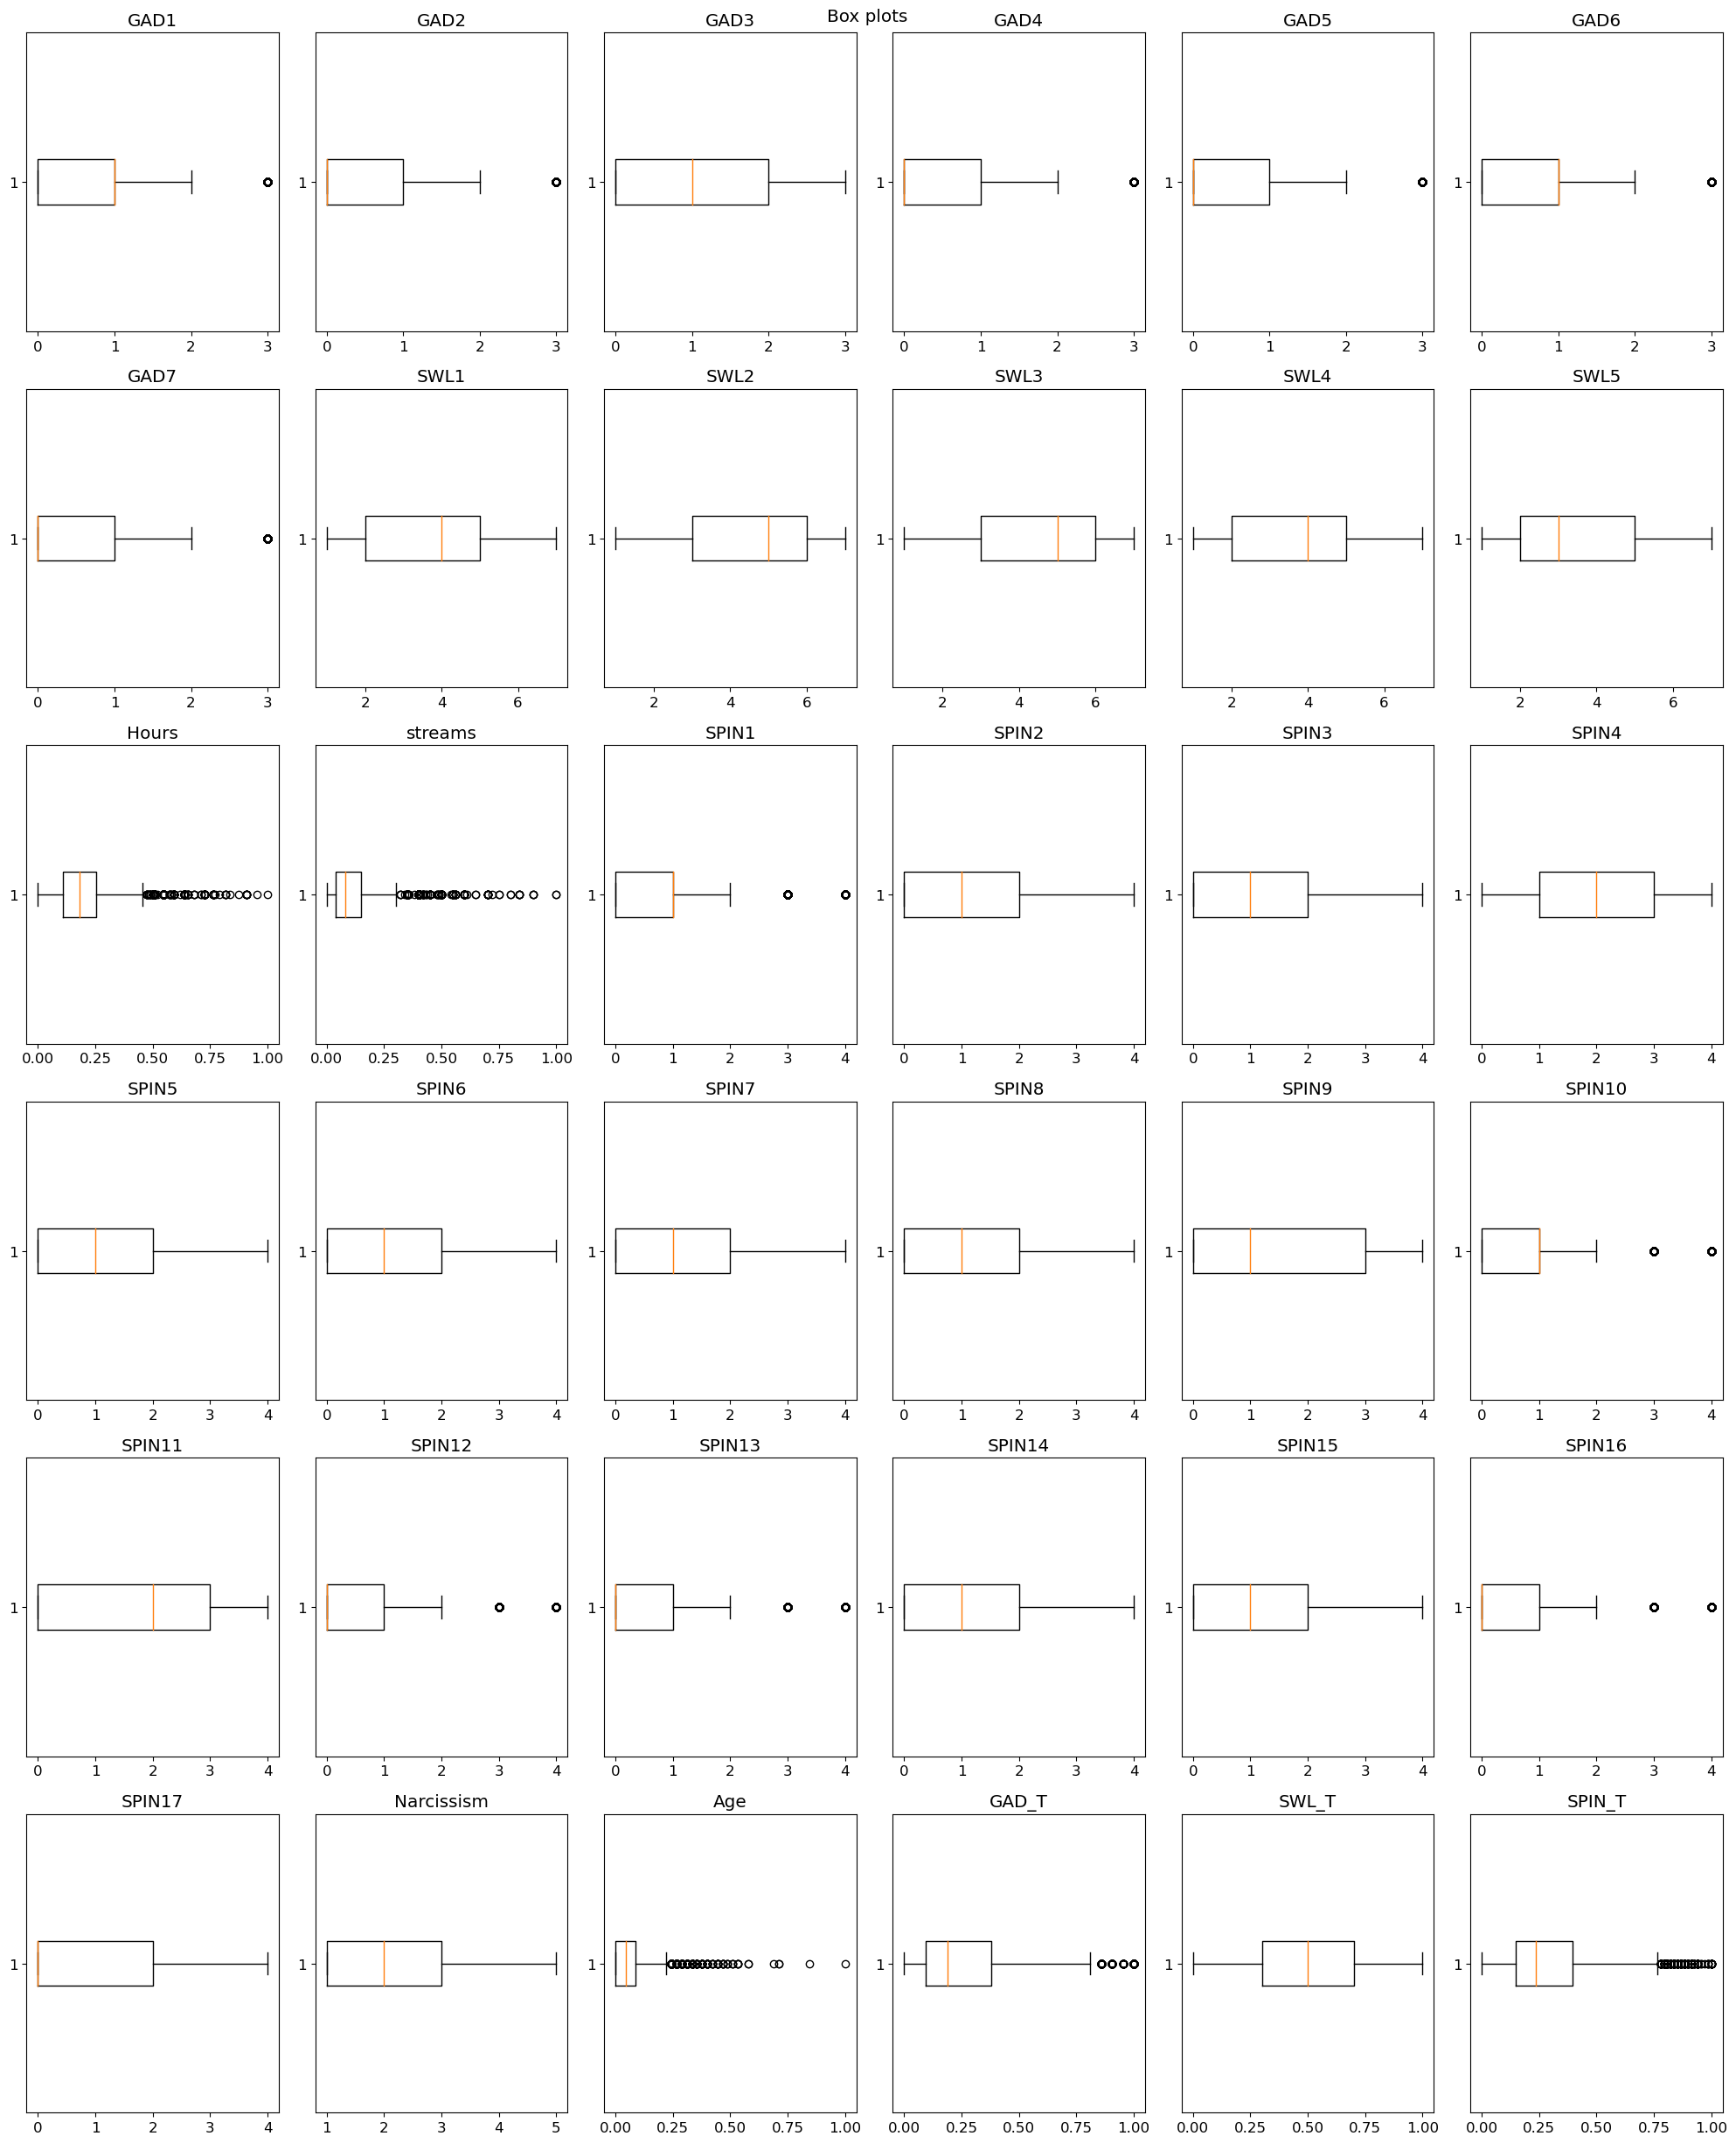

In [16]:
#Boxplot

fig, ax = plt.subplots(6, 6, figsize=(20, 25))

# Flatten the axes array so that we can iterate through it
axes = ax.flatten()

# Loop through columns and plot them in subplots
for i, (col_name, col_data) in enumerate(df.select_dtypes(exclude=['object']).iteritems()):
    if i < len(axes):
        axes[i].boxplot(col_data, vert=False)
        axes[i].set_title(col_name)

fig.suptitle('Box plots')
plt.tight_layout()
plt.show()



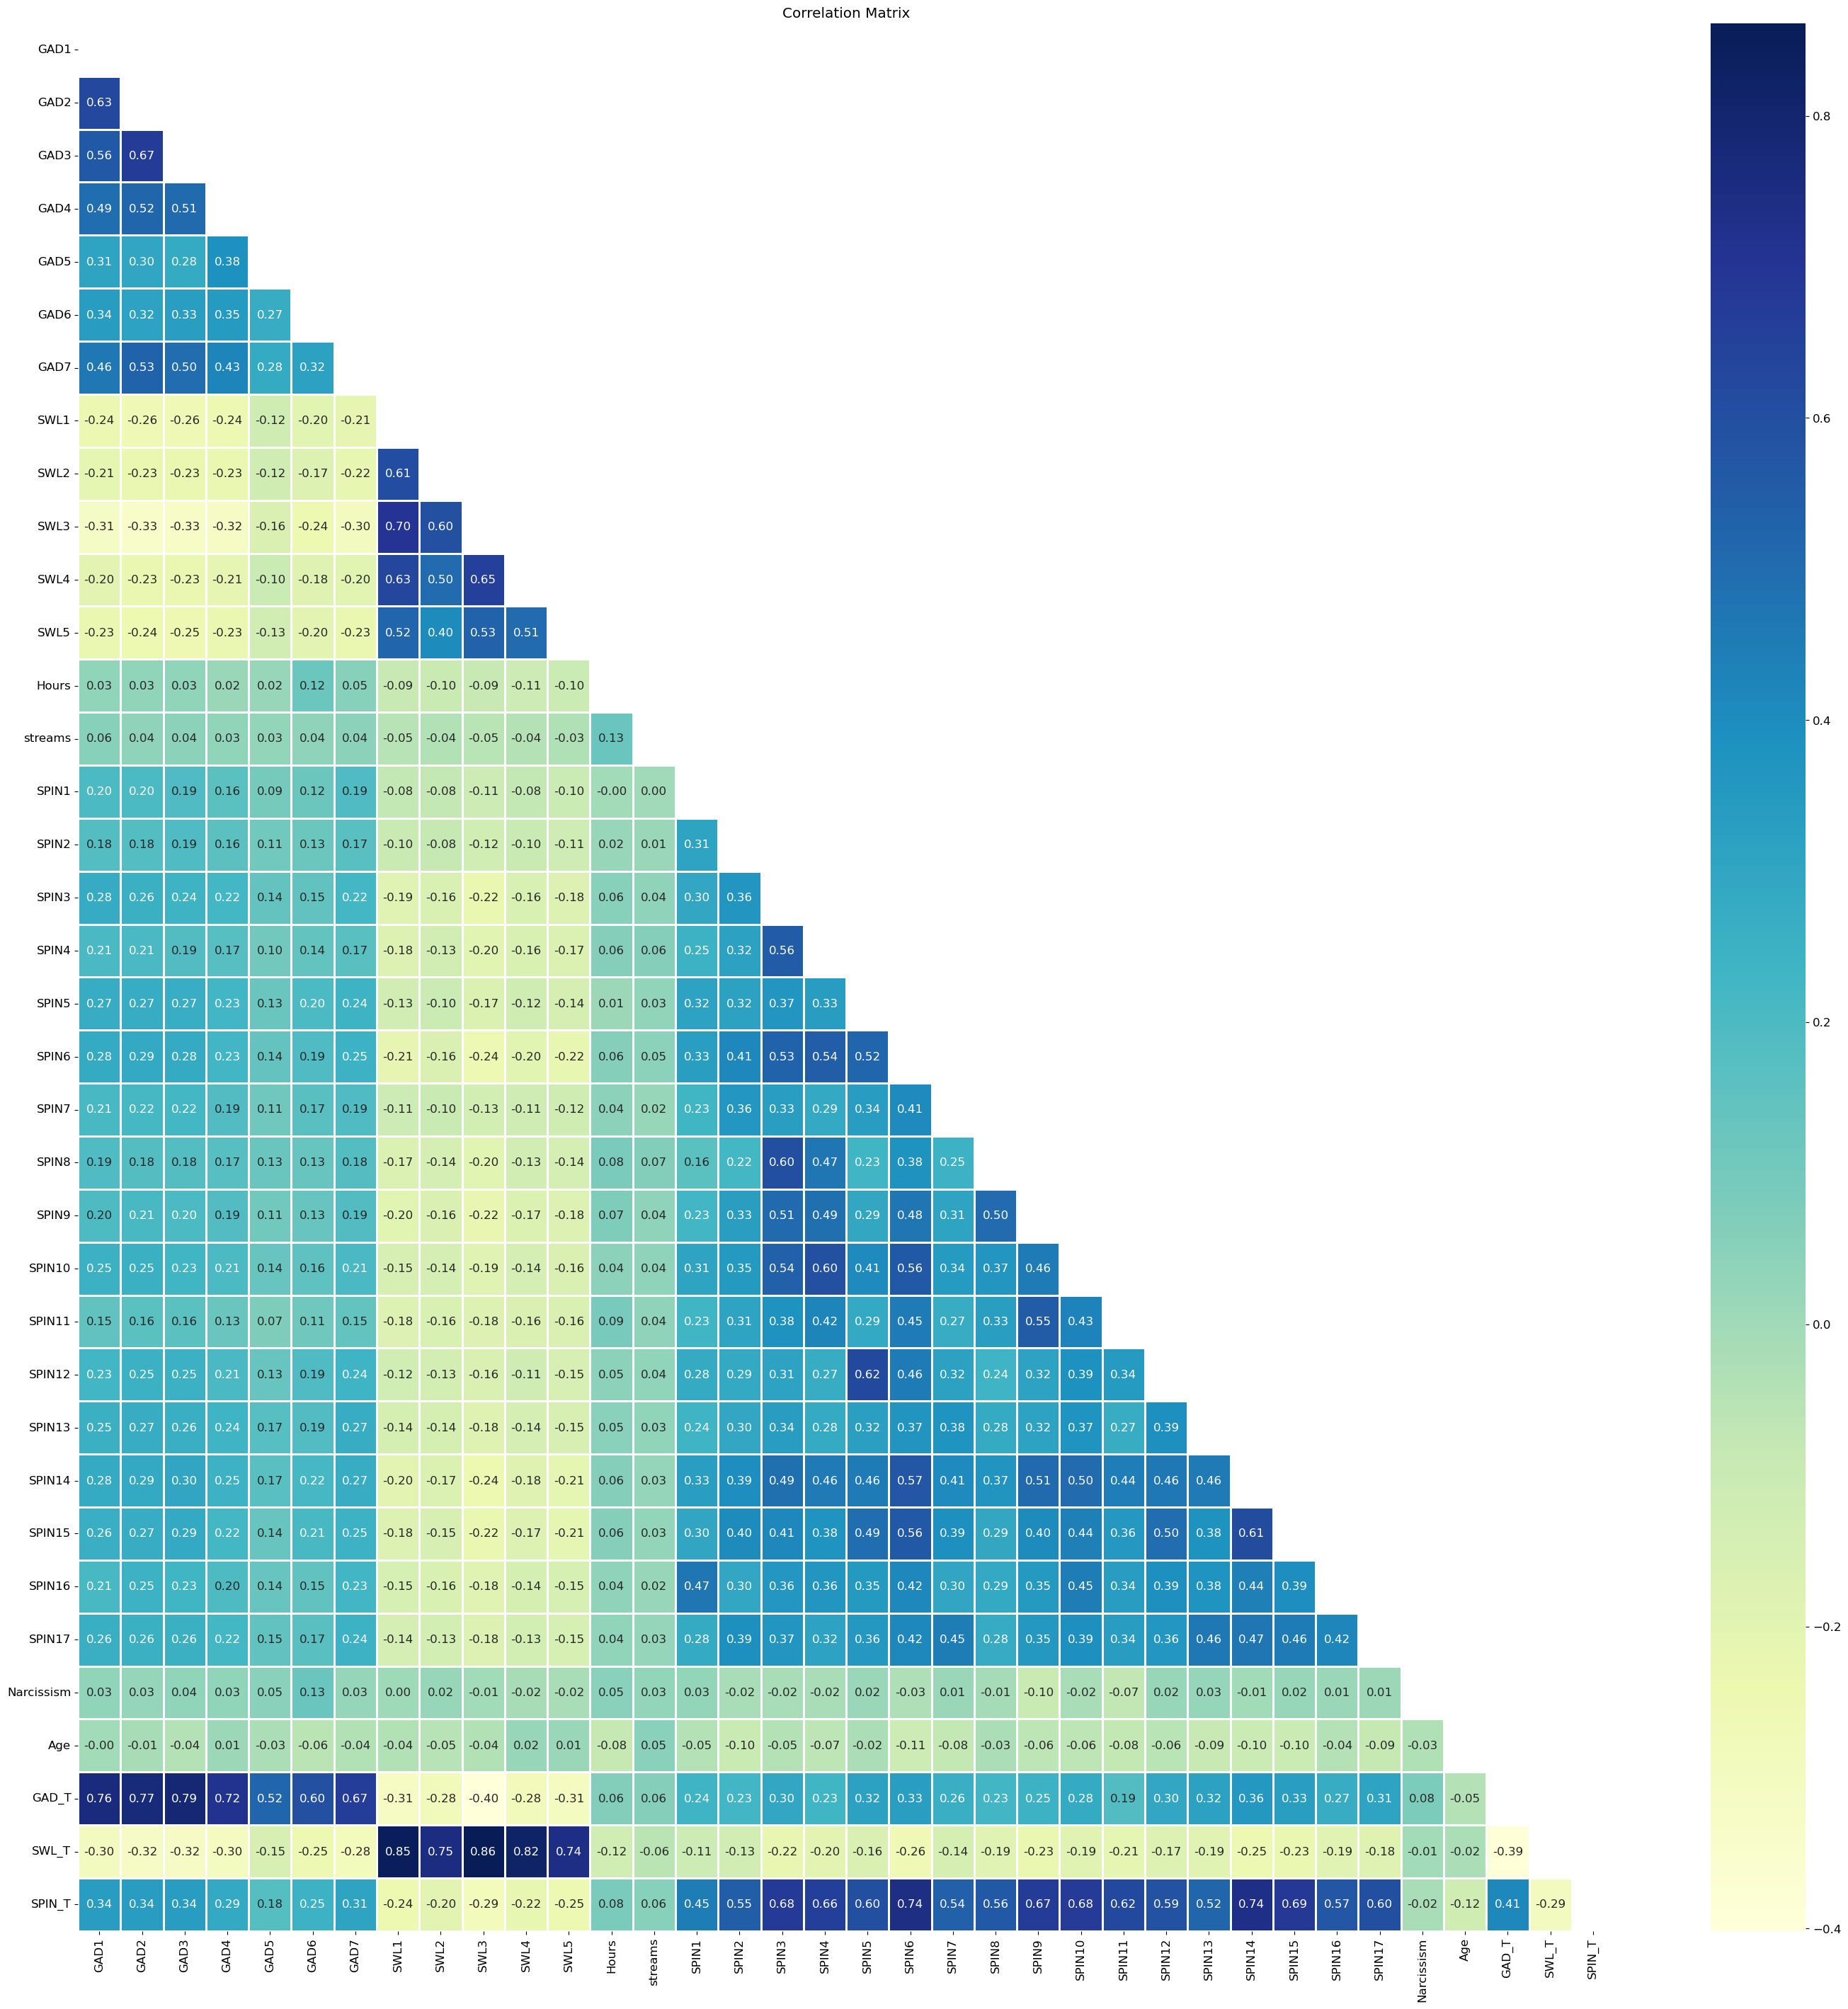

In [17]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)

#Correlations

corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()



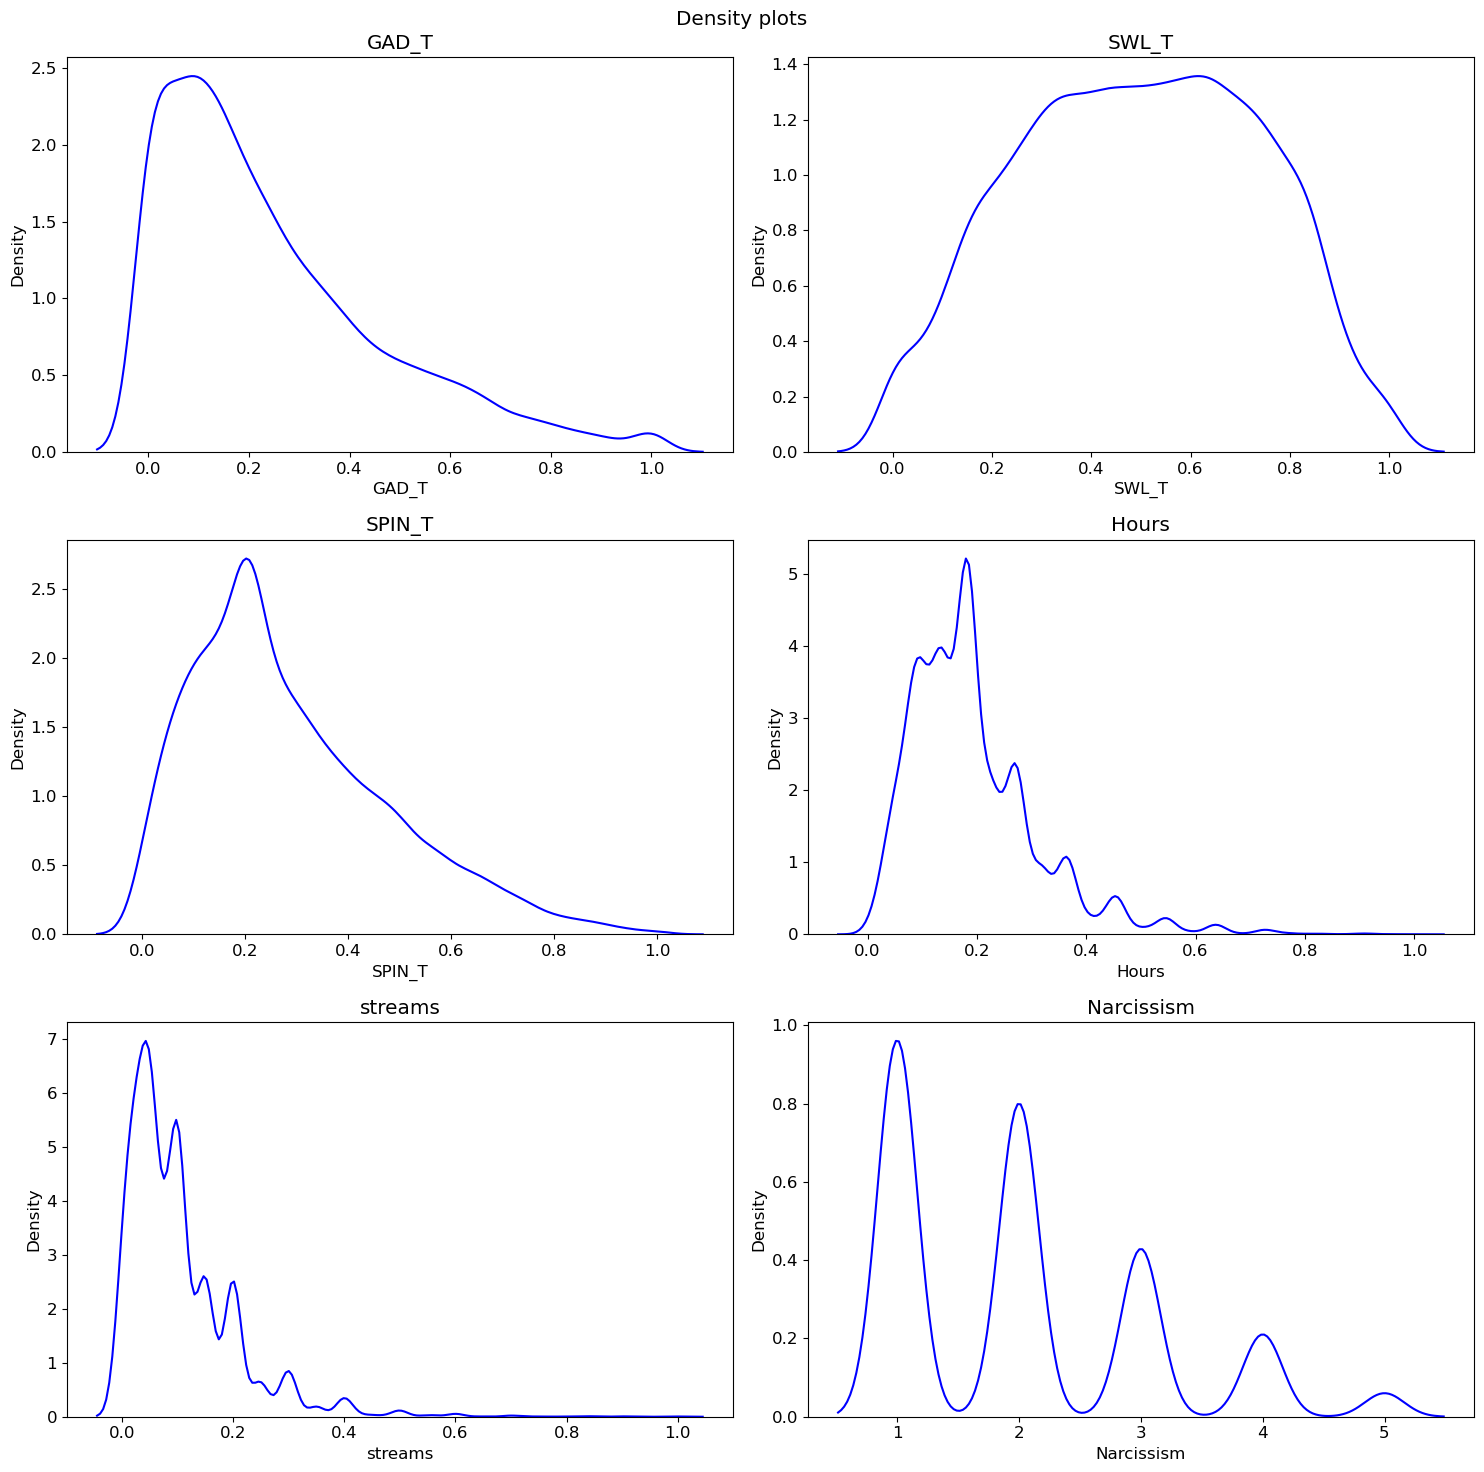

In [18]:
#Density plot

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
axes = ax.flatten()
columns_to_plot = ['GAD_T', 'SWL_T', 'SPIN_T', 'Hours', 'streams', 'Narcissism']

for i, col_name in enumerate(columns_to_plot):
    if i < len(axes):
        sns.kdeplot(df[col_name], ax=axes[i], color='b')
        axes[i].set_title(col_name)

fig.suptitle('Density plots')
plt.tight_layout()
plt.show()



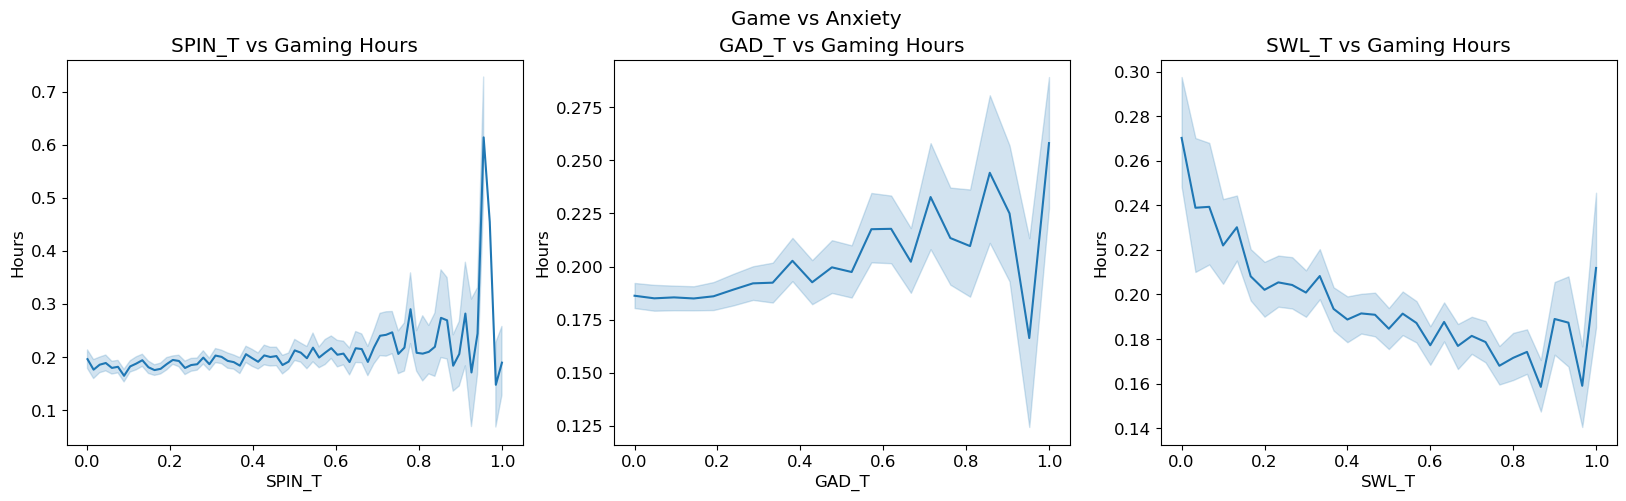

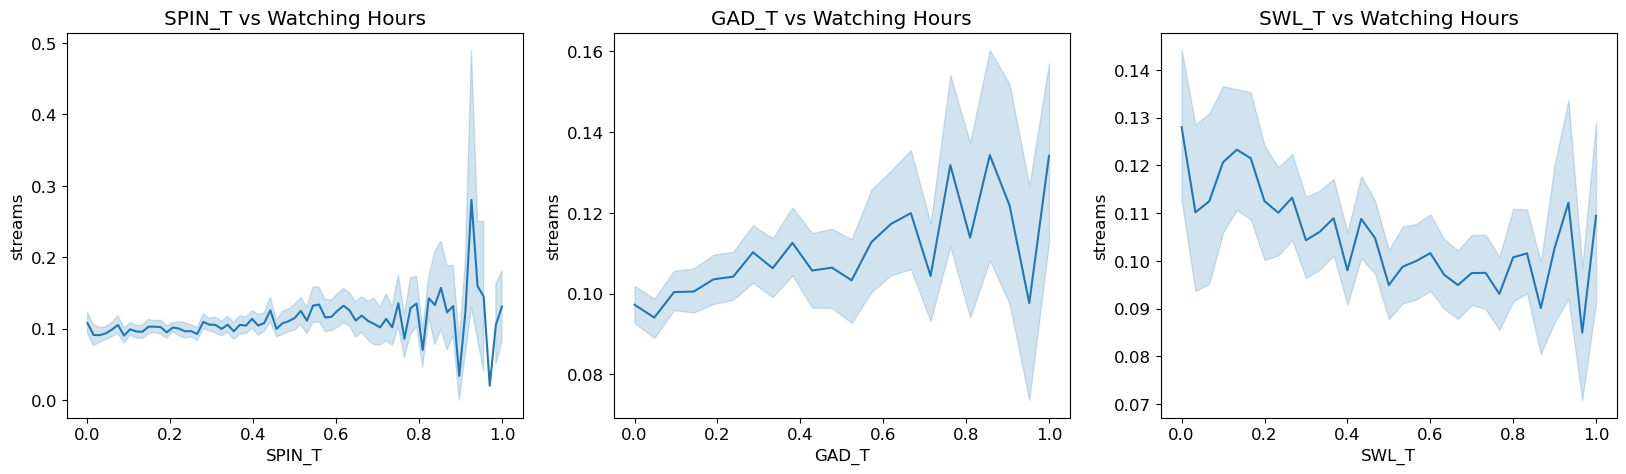

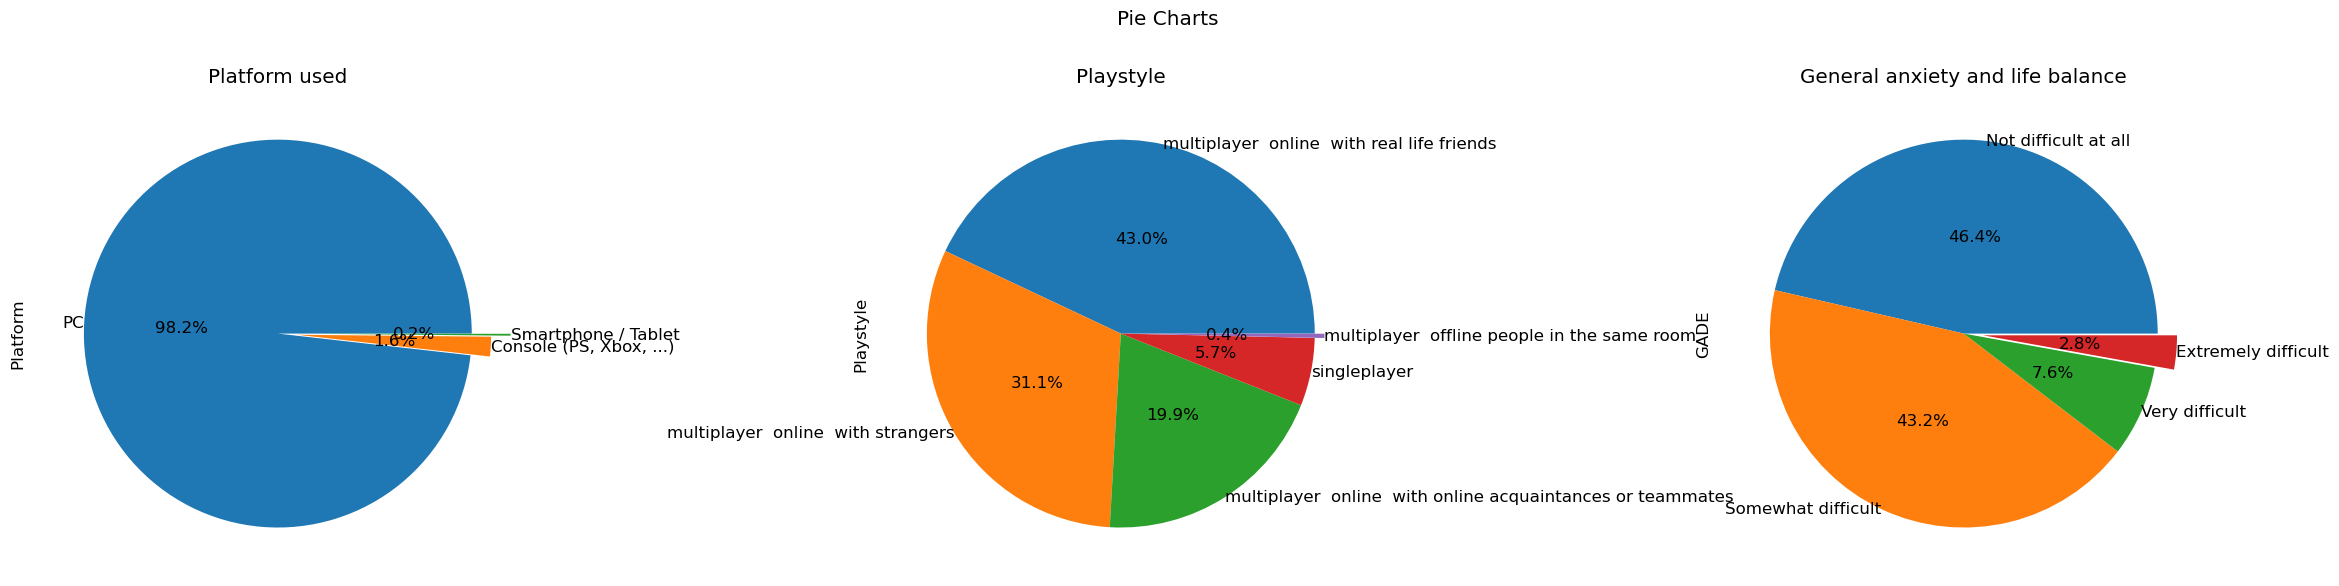

In [19]:
#Line Plot

fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="streams", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Watching Hours")

font_dict = {'weight': 'normal', 'size': 12}
mpl.rc('font', **font_dict)
def create_pie_chart(data, title, explode=None, ax=None):
    myexplode = explode if explode else [0] * len(data)
    data.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.5, labeldistance=1, explode=myexplode, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(23, 6))
fig.suptitle('Pie Charts')

create_pie_chart(df['Platform'].value_counts(), 'Platform used', explode=[0, 0.1, 0.2], ax=axes[0])
create_pie_chart(df['Playstyle'].value_counts().head(5), 'Playstyle', explode=[0, 0, 0, 0, 0.05], ax=axes[1])
create_pie_chart(df['GADE'].value_counts().head(5), 'General anxiety and life balance', explode=[0, 0, 0, 0.1], ax=axes[2])

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()




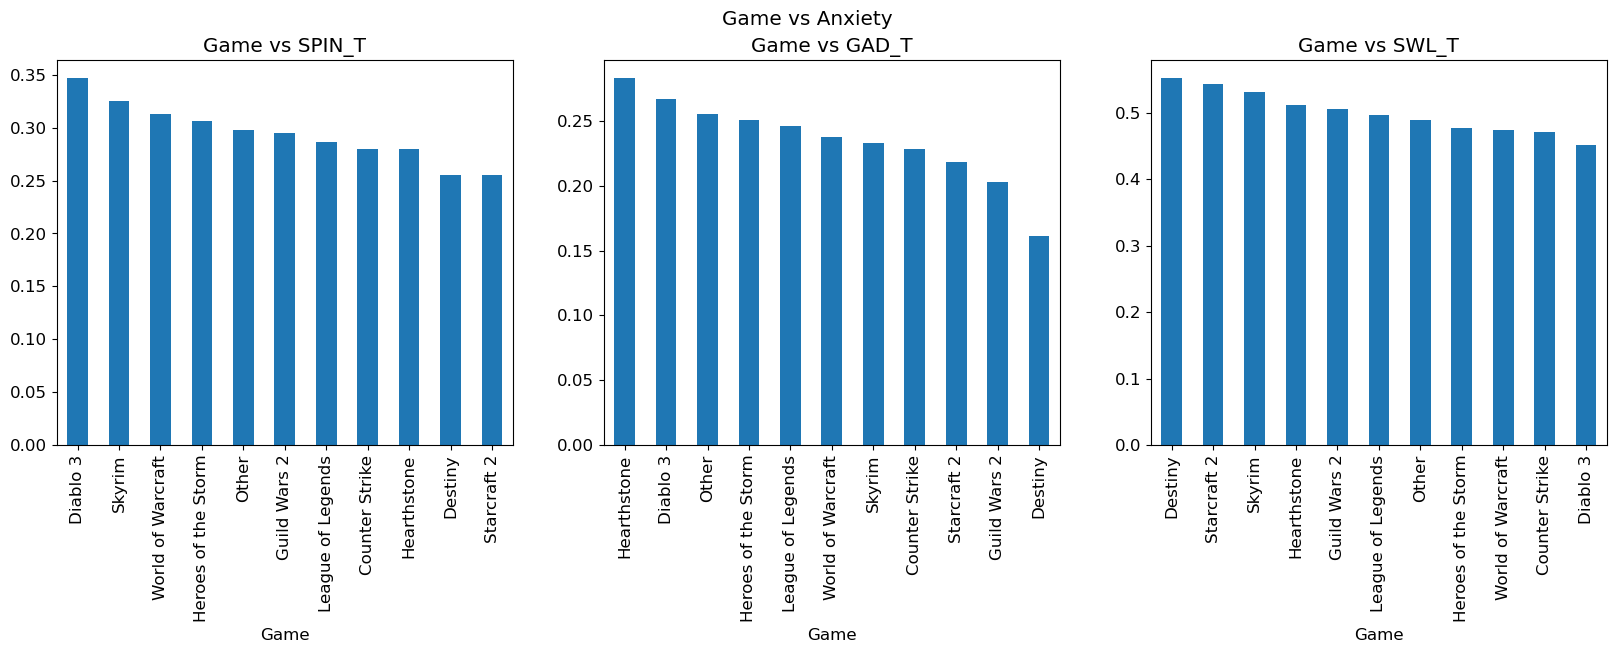

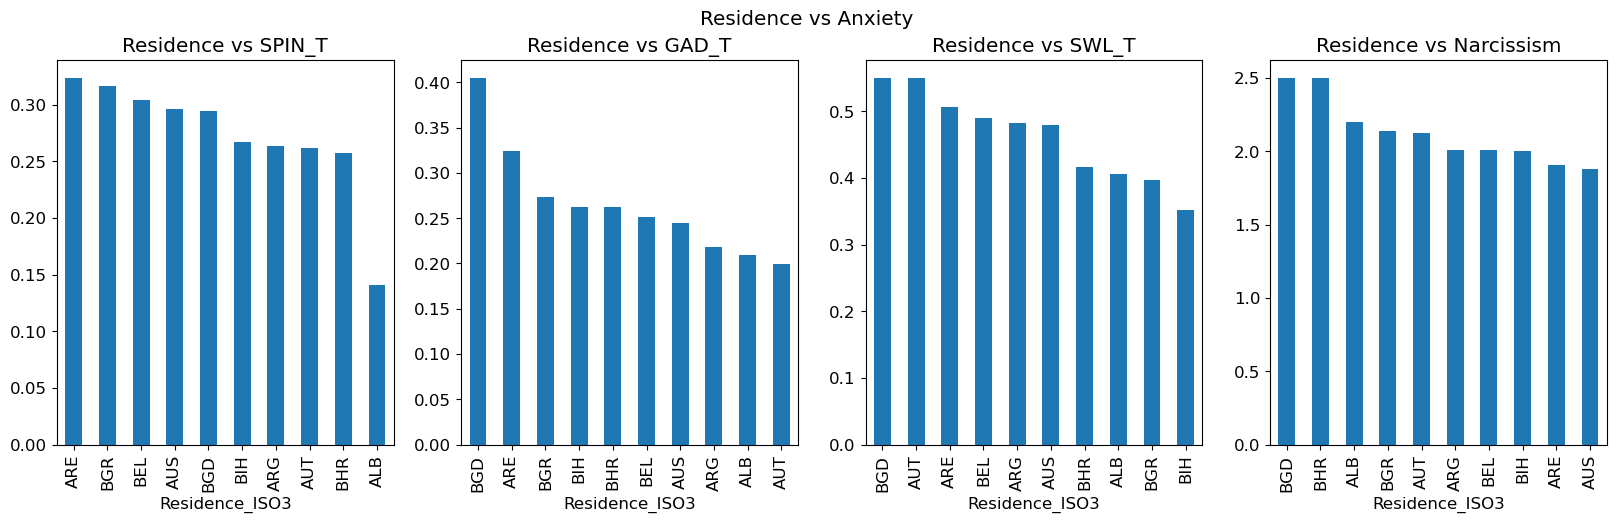

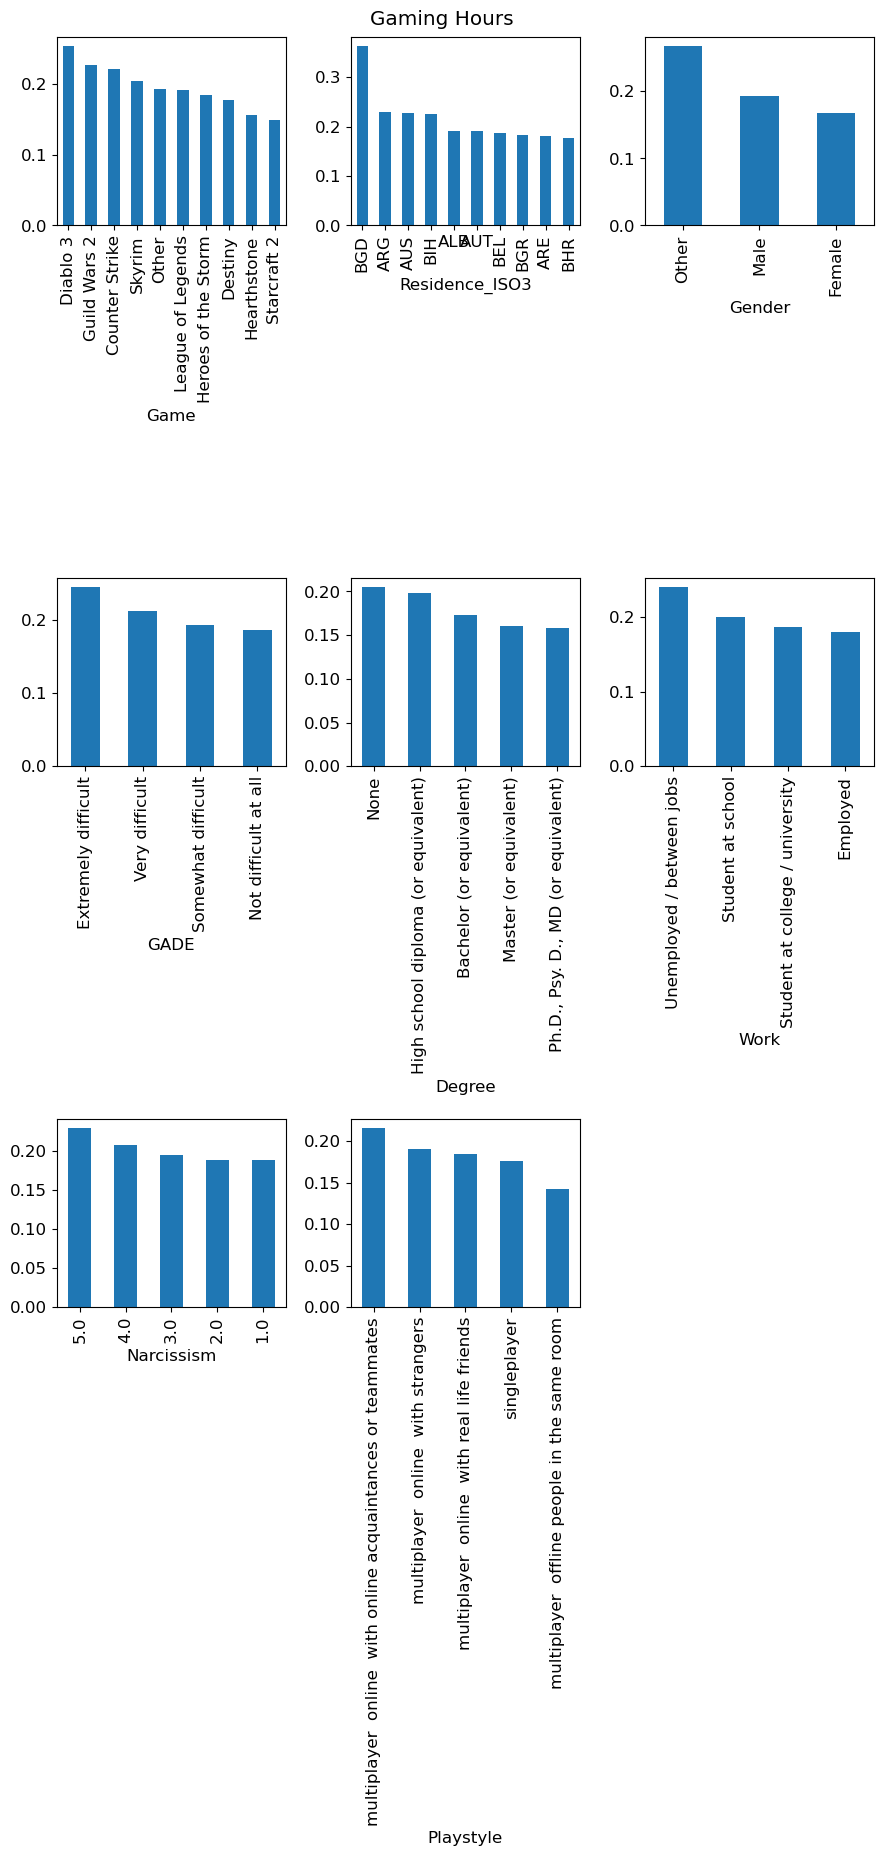

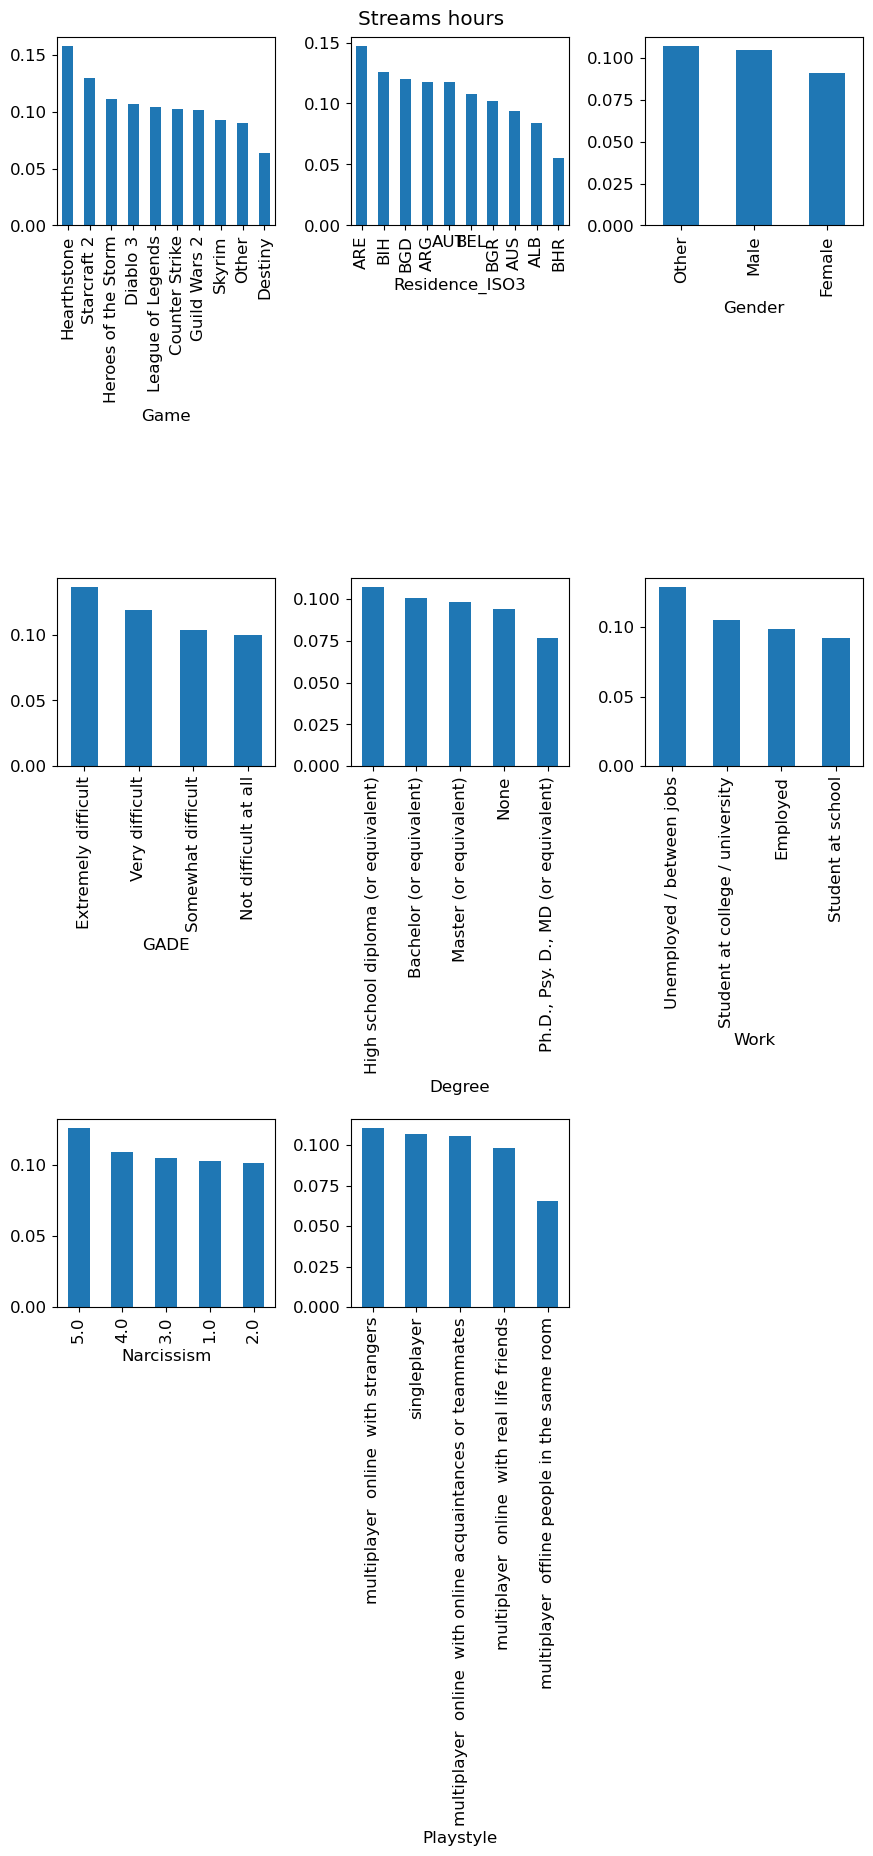

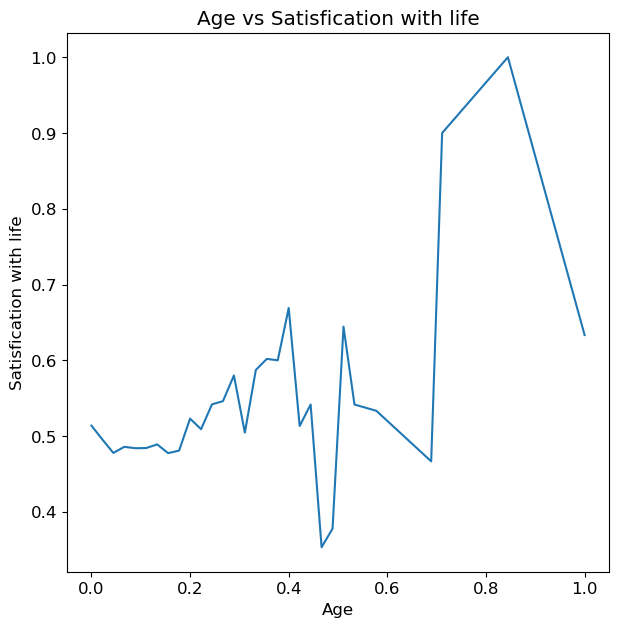

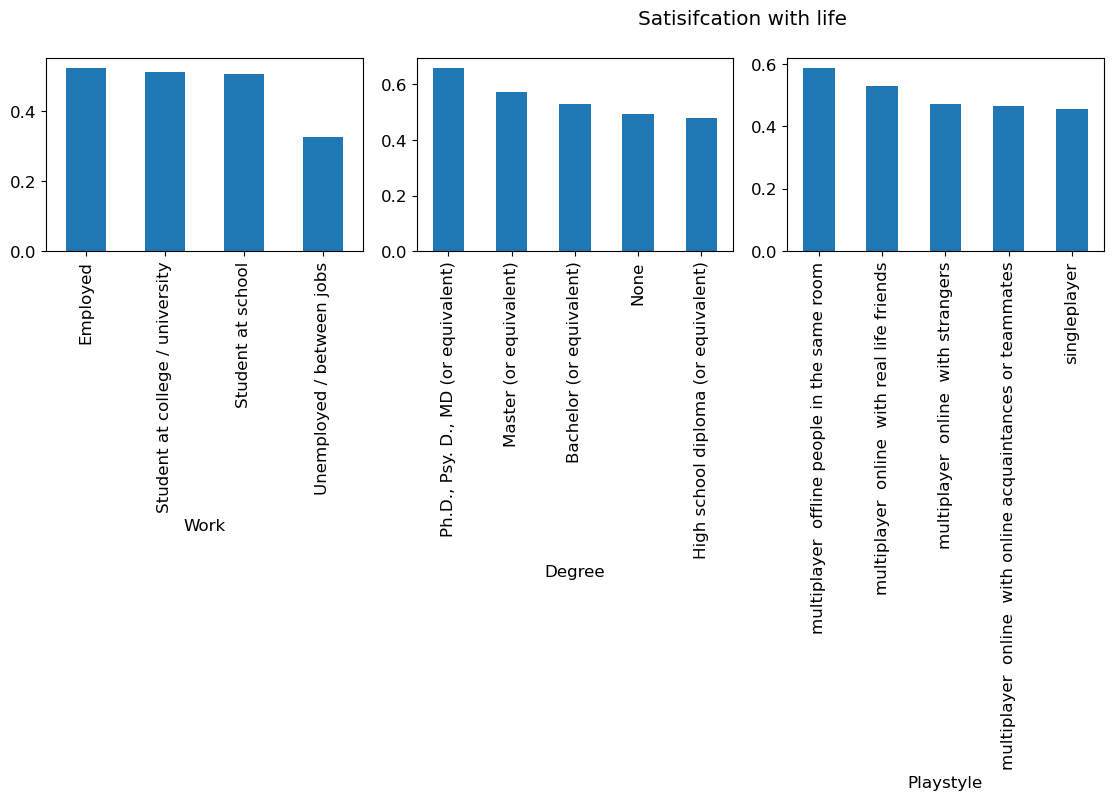

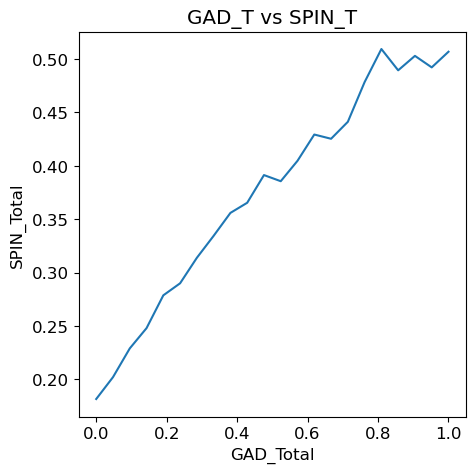

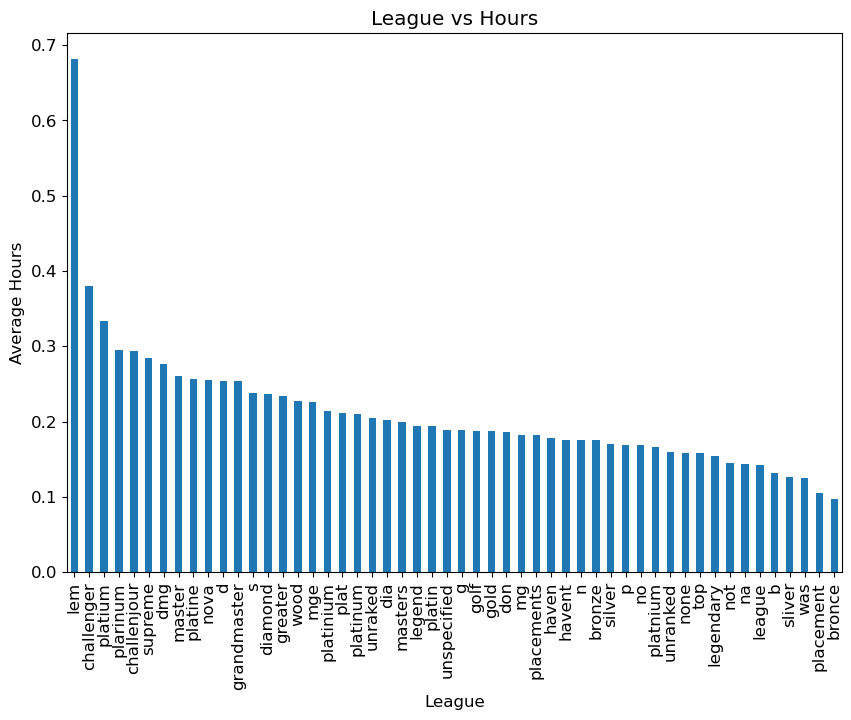

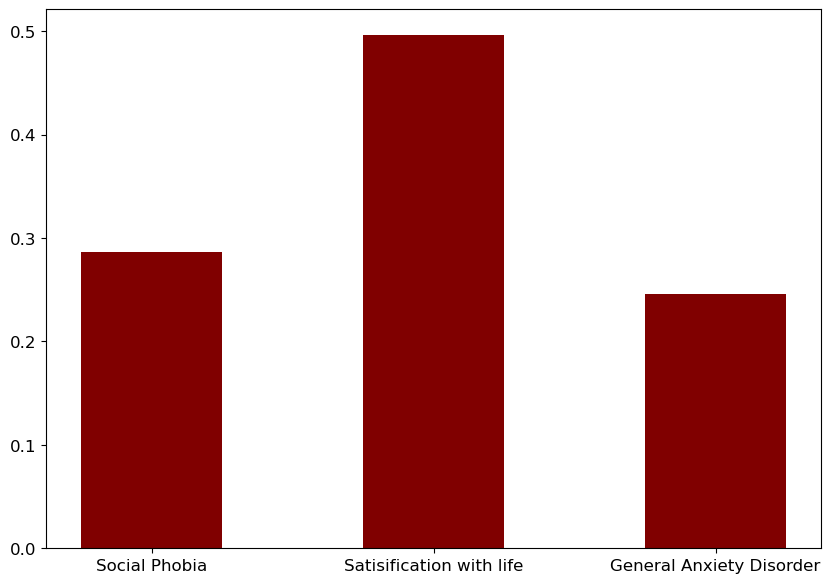

In [20]:
#Count Plot

fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T','Narcissism']

for count, ele in enumerate(labels[:-1]):
    df.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Game vs {ele}")
    
fig, axes = plt.subplots(1 , 4, figsize=(20, 5) )
fig.suptitle('Residence vs Anxiety')

for count, ele in enumerate(labels):
    df.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Residence vs {ele}")

labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(9,14))
plt.suptitle('Gaming Hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['Hours'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
    
plt.figure(figsize=(9,14))
plt.suptitle('Streams hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()



plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(15,6))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    df.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

plt.figure(figsize=(5,5))
df.groupby('GAD_T')['SPIN_T'].mean().plot()
plt.title("GAD_T vs SPIN_T")
plt.xlabel("GAD_Total")
plt.ylabel("SPIN_Total")
plt.show()

plt.figure(figsize=(10,7))
df.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')
plt.title("League vs Hours")
plt.xlabel("League")
plt.ylabel("Average Hours")
plt.show()
x=df.SPIN_T.mean()
y = df.SWL_T.mean()
z = df.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='maroon',
        width = 0.5)
plt.show()



In [21]:
#Label Encoding

le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
df.head()


,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,0.136364,1,1,48,0.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0.155556,3,0,2,4,0.047619,0.600000,0.073529,102
1,1,2,2,2,0,1,0,2,3,5,2,5,1,7,1,0.072727,1,1,48,0.02,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,0.511111,3,0,2,3,0.380952,0.366667,0.485294,102
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,1,0.181818,1,2,11,0.05,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0.222222,0,0,2,1,0.000000,0.400000,0.161765,102
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,0,0.181818,1,1,48,0.01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,0.022222,0,1,2,3,0.666667,0.300000,0.191176,56
5,0,0,0,0,0,1,0,1,3,5,3,3,3,7,0,0.036364,1,3,11,0.00,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1,0.133333,0,0,2,2,0.047619,0.400000,0.191176,102


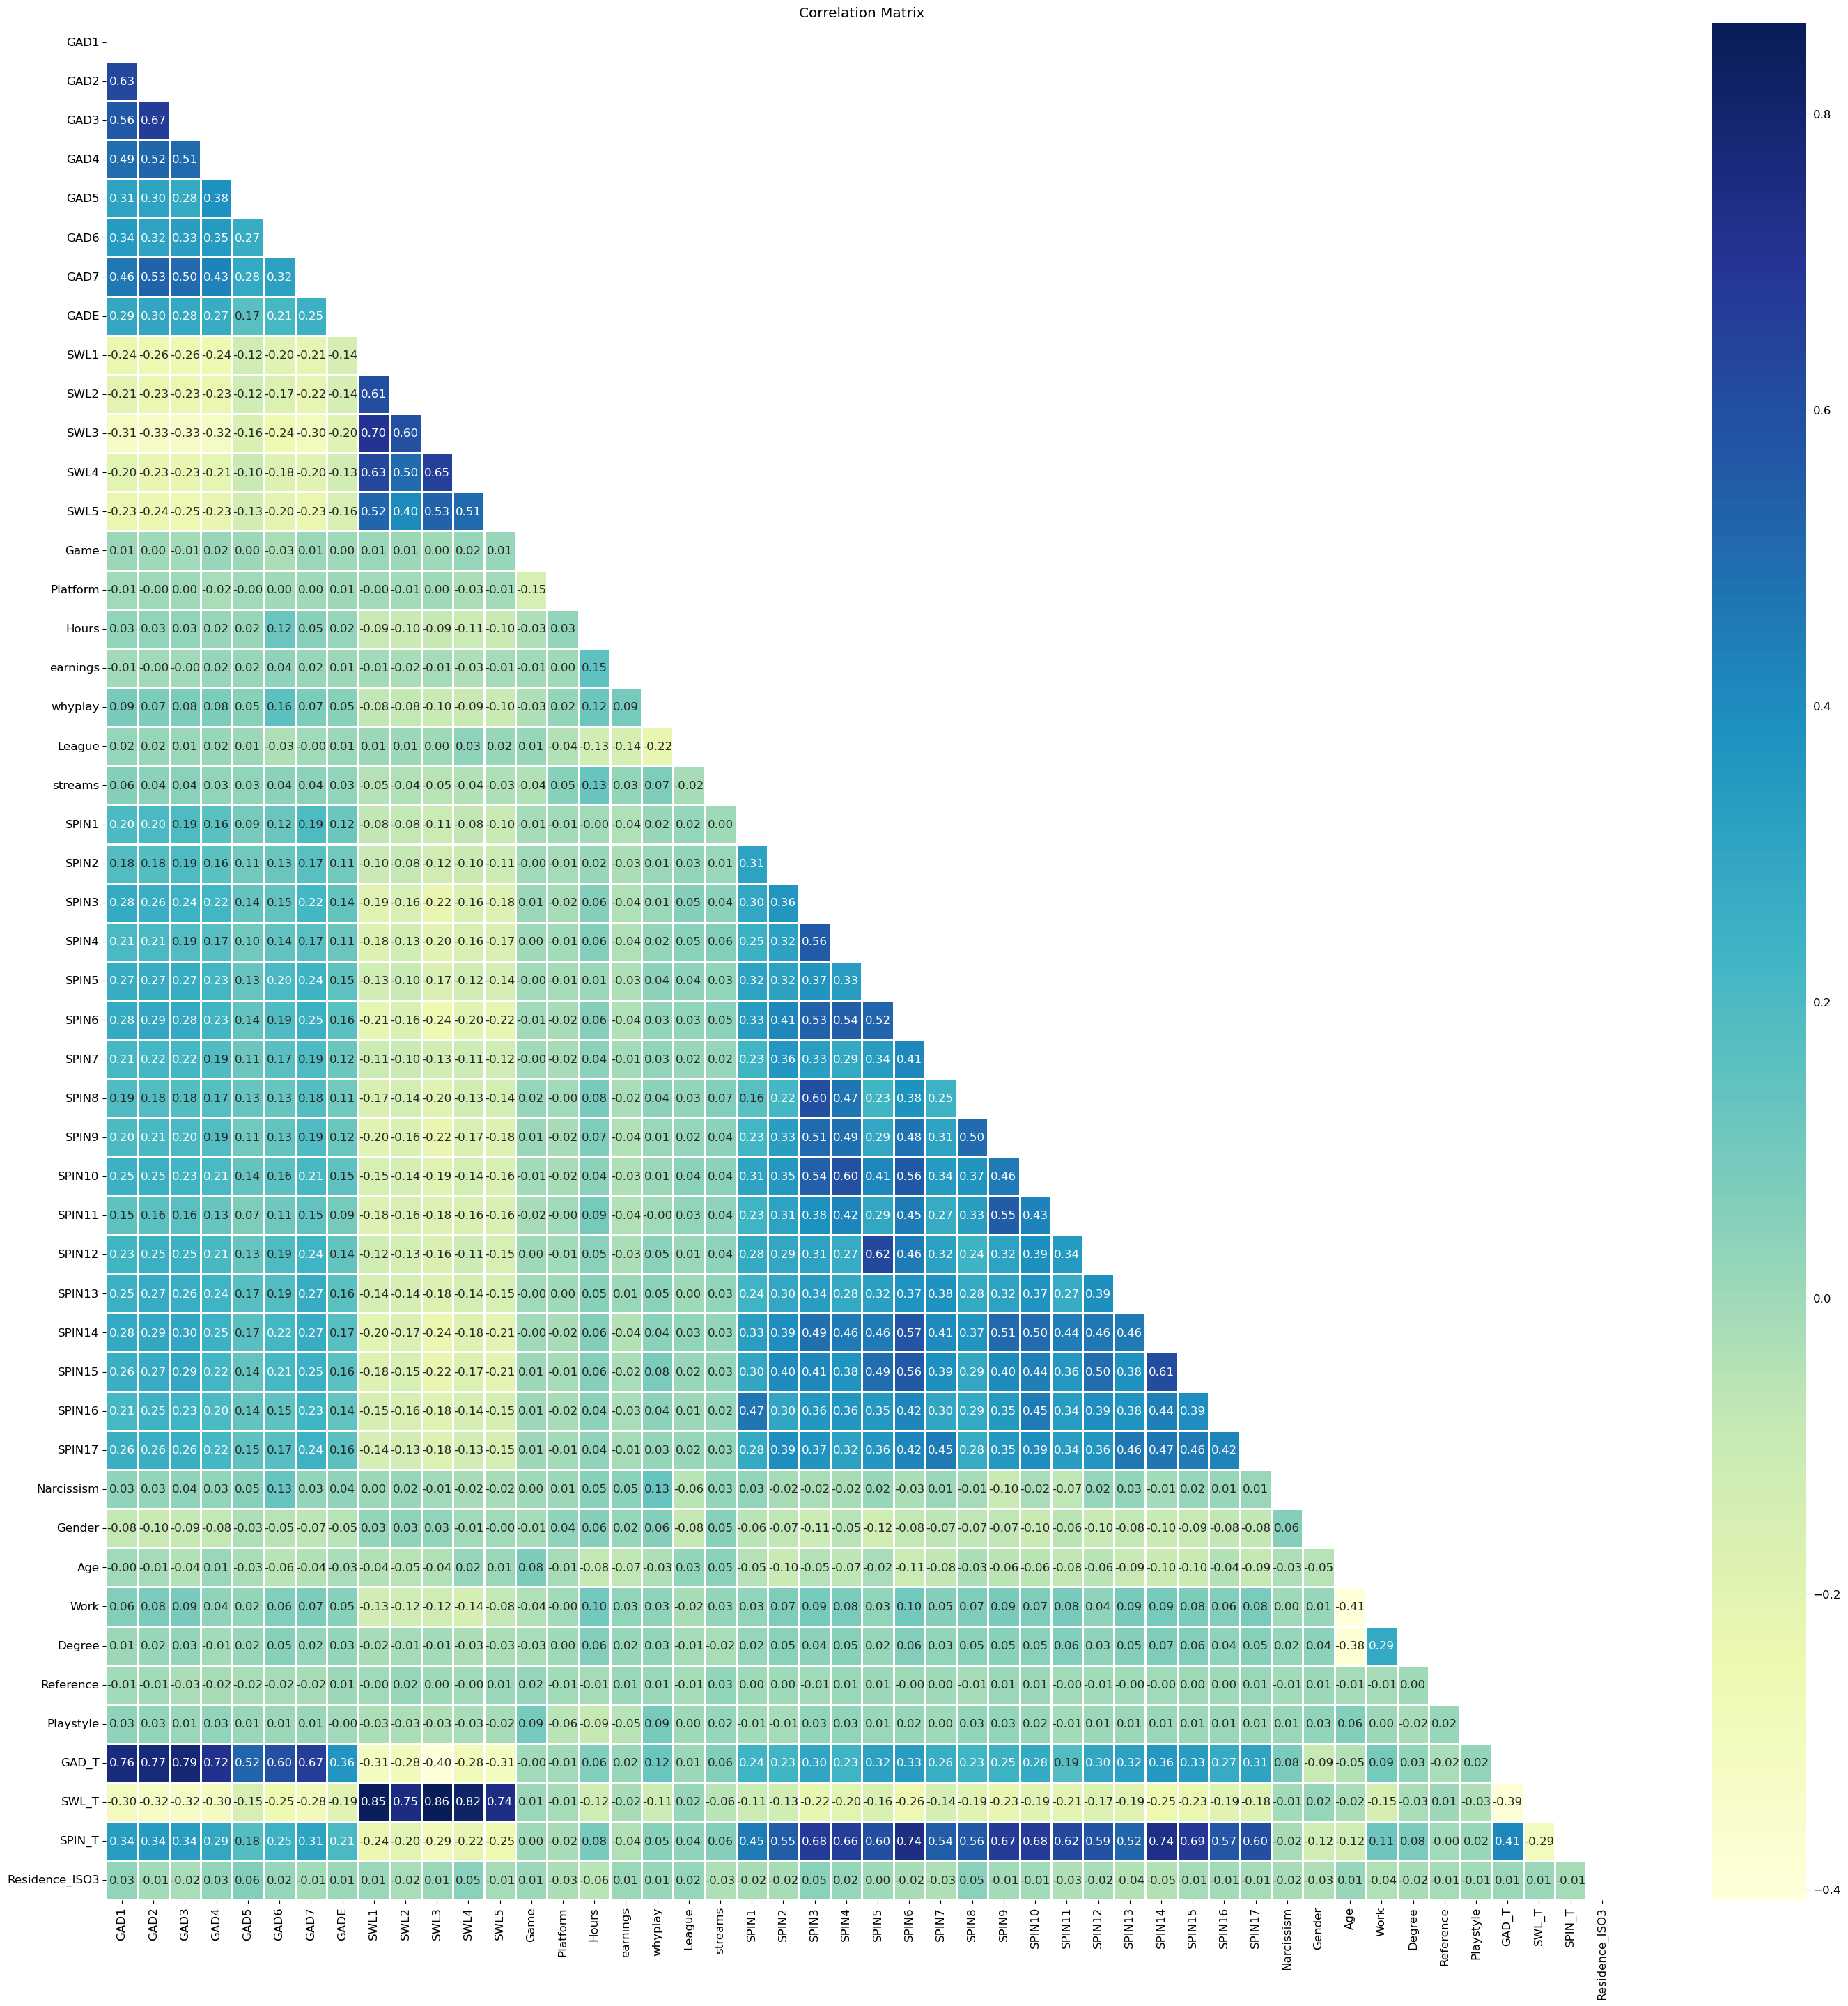

In [22]:
#feature engineering
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()


In [23]:
df1 = df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = df[[ 'Age' ,  'Hours' , 'streams' ]]
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)
x = x1 + x2



In [25]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

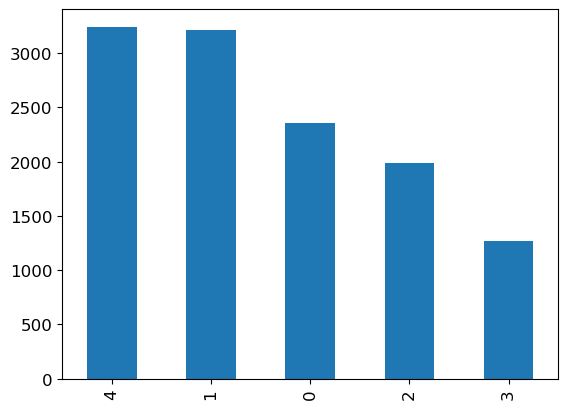

In [26]:
pd.Series(y_clusters).value_counts().plot(kind='bar');

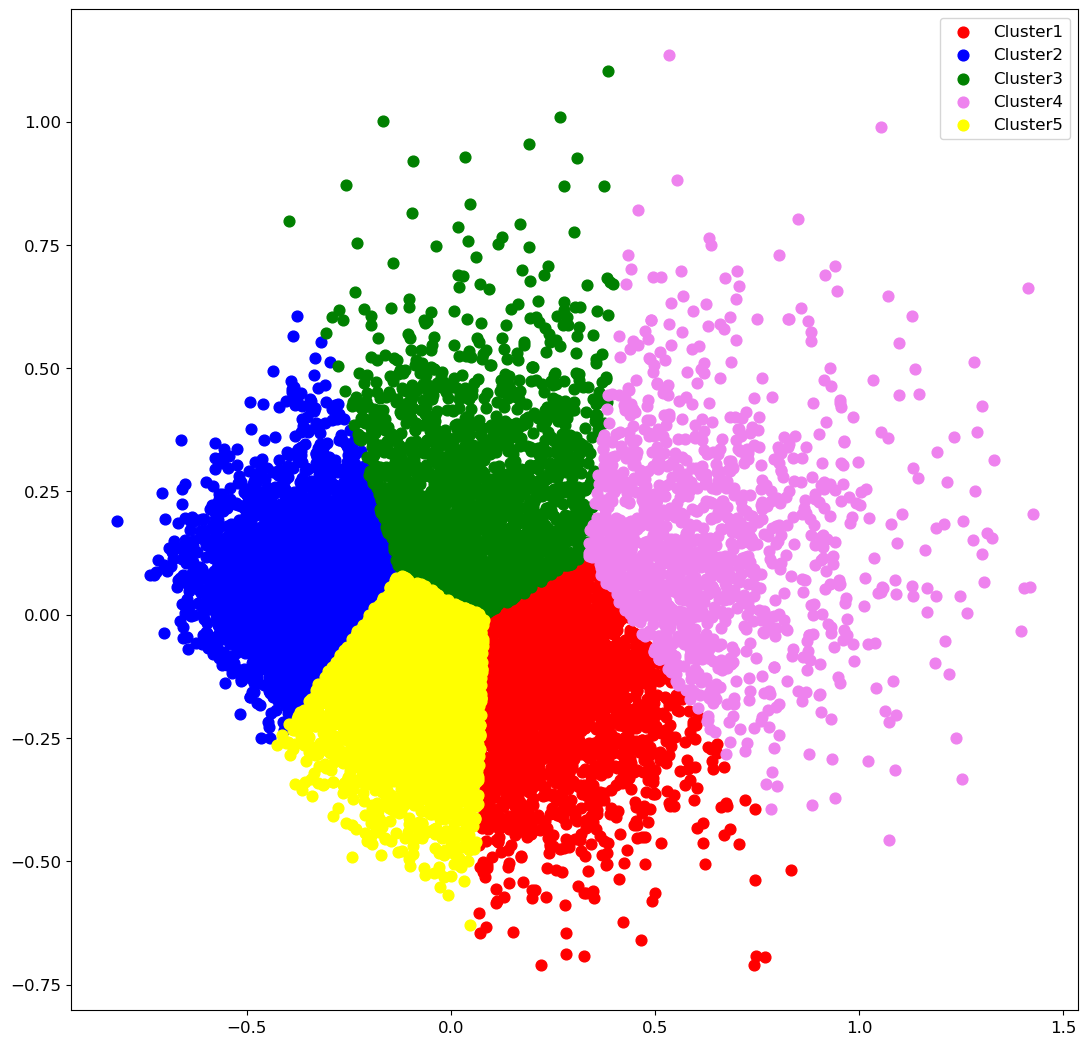

In [27]:
plt.figure(figsize=(13,13))

plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 

plt.legend()
plt.show()

In [29]:
#Adding label column to train our model for predicting in which group you are
df['Label'] = y_clusters

In [30]:
#Checking if our data is unbalanced
plt.rcParams.update({'font.size': 12})
df['Label'].value_counts()

4    3245
1    3215
0    2360
2    1992
3    1269
Name: Label, dtype: int64

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
#Splitting data to train and test

X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

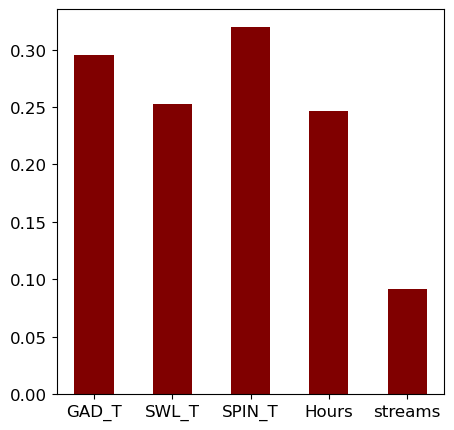

In [33]:
l1 = df[df['Label'] == 0]['GAD_T'].mean()
l2 = df[df['Label'] == 0]['SWL_T'].mean()
l3 = df[df['Label'] == 0]['SPIN_T'].mean()
l4 = df[df['Label'] == 0]['Hours'].mean()
l5 = df[df['Label'] == 0]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

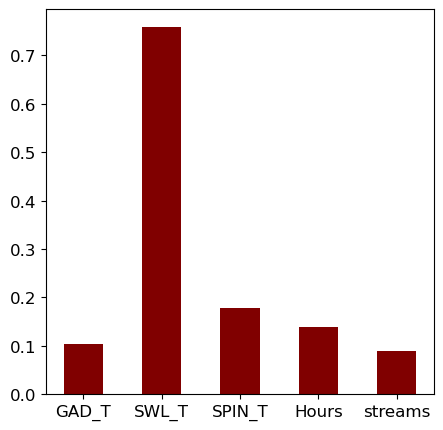

In [34]:
l1 = df[df['Label'] == 1]['GAD_T'].mean()
l2 = df[df['Label'] == 1]['SWL_T'].mean()
l3 = df[df['Label'] == 1]['SPIN_T'].mean()
l4 = df[df['Label'] == 1]['Hours'].mean()
l5 = df[df['Label'] == 1]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

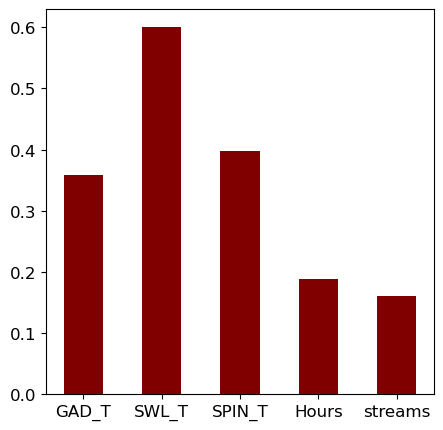

In [35]:
l1 = df[df['Label'] == 2]['GAD_T'].mean()
l2 = df[df['Label'] == 2]['SWL_T'].mean()
l3 = df[df['Label'] == 2]['SPIN_T'].mean()
l4 = df[df['Label'] == 2]['Hours'].mean()
l5 = df[df['Label'] == 2]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

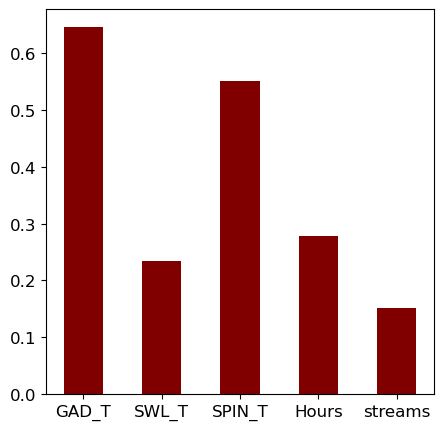

In [36]:

l1 = df[df['Label'] == 3]['GAD_T'].mean()
l2 = df[df['Label'] == 3]['SWL_T'].mean()
l3 = df[df['Label'] == 3]['SPIN_T'].mean()
l4 = df[df['Label'] == 3]['Hours'].mean()
l5 = df[df['Label'] == 3]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

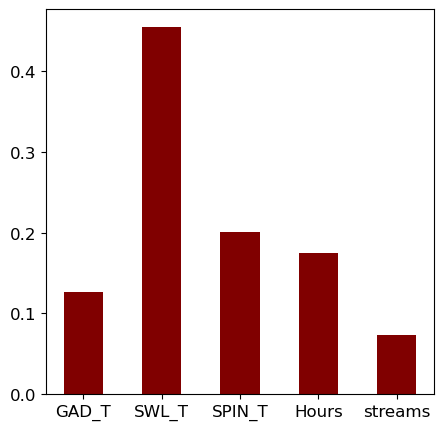

In [37]:
l1 = df[df['Label'] == 4]['GAD_T'].mean()
l2 = df[df['Label'] == 4]['SWL_T'].mean()
l3 = df[df['Label'] == 4]['SPIN_T'].mean()
l4 = df[df['Label'] == 4]['Hours'].mean()
l5 = df[df['Label'] == 4]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

In [38]:
#Random forest classification modelling
clf = RandomForestClassifier(n_estimators = 1000 , random_state=44, max_depth=8) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.8200248241621845

In [39]:
clf.score(X_train,y_train)

0.8713783112582781

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       497
           1       0.89      0.86      0.87       683
           2       0.72      0.77      0.74       332
           3       0.77      0.95      0.85       216
           4       0.84      0.78      0.81       689

    accuracy                           0.82      2417
   macro avg       0.80      0.83      0.82      2417
weighted avg       0.82      0.82      0.82      2417



In [41]:
confusion_matrix(y_pred,y_test)

array([[396,   0,  30,  40,  31],
       [  3, 586,  36,   0,  58],
       [ 18,  18, 256,  23,  17],
       [  7,   0,   3, 206,   0],
       [ 66,  53,  32,   0, 538]])

In [42]:
answer = clf.predict(X_test.iloc[30:45,:])
print(list(answer))
print(y_test.iloc[30:45].to_list())

[1, 1, 0, 4, 4, 4, 1, 4, 2, 3, 4, 0, 0, 1, 0]
[1, 1, 2, 4, 0, 4, 1, 0, 2, 3, 1, 4, 0, 1, 0]


In [43]:
lc = LogisticRegression(max_iter=3250 , n_jobs=-1 )
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

/Users/niveditaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9304923458833264

In [44]:
print(confusion_matrix(lc_pred,y_test))

[[447   0   7  13  15]
 [  0 619  10   0  20]
 [  3   8 334   8   8]
 [ 12   0   4 248   0]
 [ 28  30   2   0 601]]


In [45]:
lc.score(X_train,y_train)

0.9402938741721855

In [46]:
lc.score(X_test,y_test)

0.9304923458833264

In [48]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=200, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xg.fit(X_train,y_train)
xgpred = xg.predict(X_test)
accuracy_score(xgpred,y_test)

0.9429044269755896

In [50]:
xg.score(X_test,y_test)


0.9429044269755896

In [51]:
# Export the cleaned dataset to a CSV file
df.to_csv("cleaned_dataset.csv", index=False)

